## Multivariate Linear Regression

In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics

In [194]:
#Check the dataframe
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [195]:
#Check the dataframe columns
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [196]:
#Use one-hot encoding to change categorical data to numerical data
df1 = pd.get_dummies(df)
df1

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [197]:
#Fill NaN with number 0
df2 = df1.fillna(0)
#Check for NaN
obj = df2.isnull().sum()
for key,value in obj.iteritems():
    print(key,",",value)

Id , 0
MSSubClass , 0
LotFrontage , 0
LotArea , 0
OverallQual , 0
OverallCond , 0
YearBuilt , 0
YearRemodAdd , 0
MasVnrArea , 0
BsmtFinSF1 , 0
BsmtFinSF2 , 0
BsmtUnfSF , 0
TotalBsmtSF , 0
1stFlrSF , 0
2ndFlrSF , 0
LowQualFinSF , 0
GrLivArea , 0
BsmtFullBath , 0
BsmtHalfBath , 0
FullBath , 0
HalfBath , 0
BedroomAbvGr , 0
KitchenAbvGr , 0
TotRmsAbvGrd , 0
Fireplaces , 0
GarageYrBlt , 0
GarageCars , 0
GarageArea , 0
WoodDeckSF , 0
OpenPorchSF , 0
EnclosedPorch , 0
3SsnPorch , 0
ScreenPorch , 0
PoolArea , 0
MiscVal , 0
MoSold , 0
YrSold , 0
SalePrice , 0
MSZoning_C (all) , 0
MSZoning_FV , 0
MSZoning_RH , 0
MSZoning_RL , 0
MSZoning_RM , 0
Street_Grvl , 0
Street_Pave , 0
Alley_Grvl , 0
Alley_Pave , 0
LotShape_IR1 , 0
LotShape_IR2 , 0
LotShape_IR3 , 0
LotShape_Reg , 0
LandContour_Bnk , 0
LandContour_HLS , 0
LandContour_Low , 0
LandContour_Lvl , 0
Utilities_AllPub , 0
Utilities_NoSeWa , 0
LotConfig_Corner , 0
LotConfig_CulDSac , 0
LotConfig_FR2 , 0
LotConfig_FR3 , 0
LotConfig_Inside , 0
LandSl

In [198]:
#check on dataframe info
#we see that there is no 'object' anymore on dataframe, only numerical data such as 'float64', 'int64', 'uint8'
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 290 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(35), uint8(252)
memory usage: 792.9 KB


In [199]:
X=df2['OverallQual']
y=df2['SalePrice']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)

In [209]:
X_train.shape

(876,)

In [210]:
y_train.shape

(876,)

In [220]:
# create linear regression object
reg = linear_model.LinearRegression()

#Fix shape of X_train and y_train
X_train = X_train.reshape(876, 1)
y_train = y_train.reshape(876, 1)

# train the model using the training sets
reg.fit(X_train, y_train)

LinearRegression()

In [221]:
# regression coefficients
print('Coefficients: ', reg.coef_)

# regression intercept
print('Intercept: ', reg.intercept_)

Coefficients:  [[45253.56117258]]
Intercept:  [-95371.51582625]


In [223]:
X_test.shape

(584,)

In [224]:
y_test.shape

(584,)

Variance score: 0.642633304410077


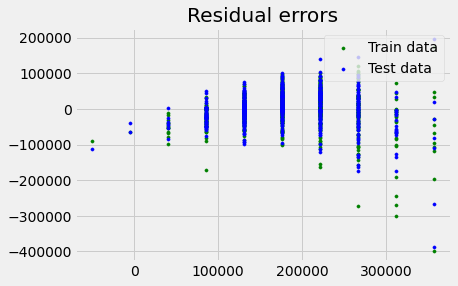

In [228]:
#Fix shape of the X_test and y_test
X_test = X_test.reshape(584, 1)
y_test = y_test.reshape(584, 1)

# variance score: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test, y_test)))
 
# plot for residual error
 
## setting plot style
plt.style.use('fivethirtyeight')
 
## plotting residual errors in training data
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
 
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')
 
## plot title
plt.title("Residual errors")
 
## method call for showing the plot
plt.show()

In [229]:
y_pred = reg.predict(X_test)

In [230]:
# MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

33962.012907883494

In [231]:
# MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

2362042742.343245

In [232]:
# RMSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

48600.85125122033

In [233]:
#Corelation between 3 features and 'SalePrice' as target
df2[['OverallQual', 'GrLivArea', 'GarageArea', 'SalePrice']].corr()['SalePrice'][:]

OverallQual    0.790982
GrLivArea      0.708624
GarageArea     0.623431
SalePrice      1.000000
Name: SalePrice, dtype: float64

## Classification Models

In [234]:
df4 = pd.read_csv('heart.csv')
df4

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [240]:
#Use one-hot encoding to change categorical data to numerical data
df5 = pd.get_dummies(df4)
df5

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [241]:
#Check for NaN
obj = df5.isnull().sum()
for key,value in obj.iteritems():
    print(key,",",value)

Age , 0
RestingBP , 0
Cholesterol , 0
FastingBS , 0
MaxHR , 0
Oldpeak , 0
HeartDisease , 0
Sex_F , 0
Sex_M , 0
ChestPainType_ASY , 0
ChestPainType_ATA , 0
ChestPainType_NAP , 0
ChestPainType_TA , 0
RestingECG_LVH , 0
RestingECG_Normal , 0
RestingECG_ST , 0
ExerciseAngina_N , 0
ExerciseAngina_Y , 0
ST_Slope_Down , 0
ST_Slope_Flat , 0
ST_Slope_Up , 0


In [252]:
X1=df5['Age']
y1=df5['HeartDisease']
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.4,
                                                    random_state=1)

In [253]:
X_train1.shape

(550,)

In [254]:
y_train1.shape

(550,)

In [260]:
#Fix shape of X_train
X_train1 = X_train1.reshape(550, 1)

#Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train1, y_train1)

In [264]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train1, y_train1)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [266]:
#Hyperparameter tuning
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [267]:
from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train1, y_train1)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [268]:
grid_search.best_score_

0.6436316513276208

In [269]:
rf_best = grid_search.best_estimator_
rf_best.fit(X_train1, y_train1)

RandomForestClassifier(max_depth=2, min_samples_leaf=100, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [271]:
X_test1.shape

(368,)

In [273]:
#Fix shape of X_test
X_test1 = X_test1.values.reshape(368,1)
#Evaluate the result with confusion matrix, classification report, and AUC
y_lr = lr.predict(X_test1)
y_dtree = dtree.predict(X_test1)
y_rf = rf_best.predict(X_test1)

In [278]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test1, y_lr))
print(confusion_matrix(y_test1, y_rf))

[[ 72  81]
 [ 65 150]]
[[ 96  57]
 [ 86 129]]


In [279]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test1, y_lr))
print(classification_report(y_test1, y_rf))

              precision    recall  f1-score   support

           0       0.53      0.47      0.50       153
           1       0.65      0.70      0.67       215

    accuracy                           0.60       368
   macro avg       0.59      0.58      0.58       368
weighted avg       0.60      0.60      0.60       368

              precision    recall  f1-score   support

           0       0.53      0.63      0.57       153
           1       0.69      0.60      0.64       215

    accuracy                           0.61       368
   macro avg       0.61      0.61      0.61       368
weighted avg       0.62      0.61      0.61       368



In [280]:
#AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test1, y_lr, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test1, y_rf, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))

0.5841313269493844
0.6137254901960785


In [283]:
#Whick model is better?
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test1, y_lr))
print(accuracy_score(y_test1, y_rf))

from sklearn.metrics import precision_score
print(precision_score(y_test1, y_lr, average='macro'))
print(precision_score(y_test1, y_rf, average='macro'))

from sklearn.metrics import recall_score
print(recall_score(y_test1, y_lr, average='macro'))
print(recall_score(y_test1, y_rf, average='macro'))

0.6032608695652174
0.6114130434782609
0.5874490473030619
0.6105104572846509
0.5841313269493844
0.6137254901960785


In [ ]:
#From data above Random Forest has the greatest amout of precision, accuracy, and true positive rate (recall)